# APRESENTAÇÃO EXECUTIVA 

- Vamos usar a base de vendas do kaggle disponível em:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

### O que queremos responder?
- Como foi a **venda** nesse período?
- Qual foi a **categoria mais vendida**?
- Qual foi o **item mais vendido**?


In [9]:
# Importando as bibliotecas e a base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
base = pd.read_csv("Criando uma apresentação executiva.csv")

### Entendendo e tratando a base

In [3]:
# Visualizando as informações da base
base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
base.info()
#Apenas o postal code tem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# Verificando os registros com Postal Code vazio
base = base.rename(columns={'Postal Code': 'PostalCode'})
base.loc[base.PostalCode.isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Todos os registros sem código postal são da cidade de Burlington, em Vermont. Será que algum registro dessa cidade possui código postal?

In [6]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code
base[(base.City == 'Burlington') & (base.State == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,PostalCode,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [7]:
# Atualizando essa informação a partir de uma pesquisa no google
base.loc[(base.PostalCode).isnull(), 'PostalCode'] = 5401

In [8]:
# Verificando se ainda existe algum valor nulo
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  PostalCode     9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

as colunas de data não estão como data e sim como objeto precisamos alterar isso

In [11]:
base["Order Date"] = pd.to_datetime(base["Order Date"])
base["Ship Date"] = pd.to_datetime(base["Ship Date"])

In [12]:
base['Order Date'].min()

Timestamp('2015-01-02 00:00:00')

In [13]:
base['Order Date'].max()


Timestamp('2018-12-30 00:00:00')

São 4 anos de análise então vamos dividir as vendas por ano

In [14]:
base['Ano'] = base['Order Date'].dt.year
base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016


### Como foi a venda


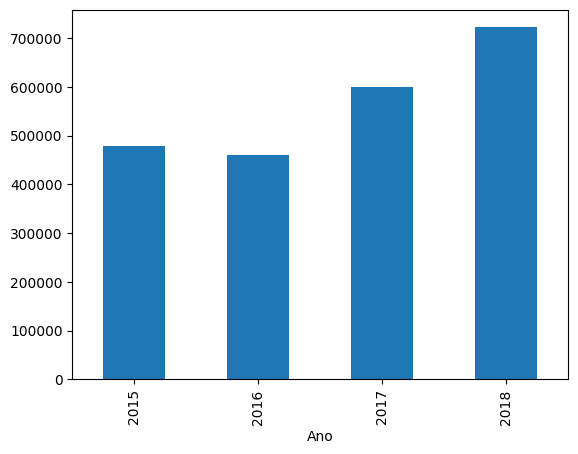

In [15]:
# Usando essa coluna no group by e criando um plot de barras
base.groupby(["Ano"])["Sales"].sum().plot.bar();


Podemos melhorar o gráfico usando o matplotlib

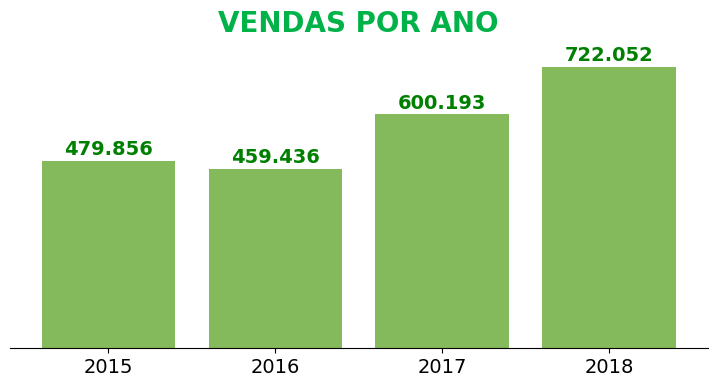

In [18]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )
    
ax.set_yticks(np.array([0,790000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Podemos analisar a venda por mês tambem

In [19]:
# Criando uma coluna com o mês
base['mes'] = base['Order Date'].dt.month
base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11


In [20]:
# Fazendo o groupby agora por mês e ano
base.groupby(["Ano","mes"])["Sales"].sum()

Ano   mes
2015  1      28828.2540
      2      12588.4840
      3      54027.6920
      4      24710.0160
      5      29520.4900
      6      29181.3346
      7      35194.5580
      8      37349.2655
      9      65956.3998
      10     34561.9470
      11     64369.4565
      12     63568.3107
2016  1      29347.3864
      2      20728.3520
      3      34489.6776
      4      38056.9685
      5      30761.5585
      6      28515.9082
      7      28573.3100
      8      49076.9300
      9      65352.9970
      10     31631.8890
      11     50009.1450
      12     52891.8832
2017  1      38048.1840
      2      48907.5900
      3      48990.1410
      4      42368.0480
      5      64836.2518
      6      37424.6810
      7      41761.9430
      8      45766.8144
      9      40692.3063
      10     52156.9580
      11     66392.5470
      12     72847.0855
2018  1      59767.0910
      2      48928.8334
      3      74748.6238
      4      37849.2156
      5      40882.4464
      

In [22]:
# Verificando os valores gerados
soma_mes = base.groupby(["Ano","mes"])["Sales"].sum()
# Vamos transformar os índices em colunas
soma_mes = soma_mes.reset_index()
# Visualizando a base novamente
soma_mes

,Ano,mes,Sales
0,2015,1,28828.2540
1,2015,2,12588.4840
2,2015,3,54027.6920
3,2015,4,24710.0160
4,2015,5,29520.4900
5,2015,6,29181.3346
6,2015,7,35194.5580
7,2015,8,37349.2655
8,2015,9,65956.3998
9,2015,10,34561.9470


Podemos fazer o gráfico para os meses

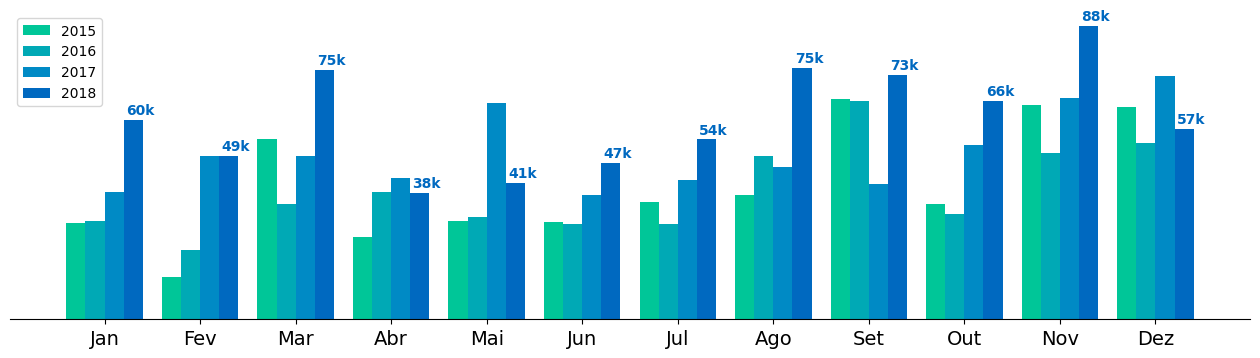

In [23]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x
    
plt.show()

### Podemos analisar por categoria tambem

In [24]:
# Criando agora a base de categorias como fizemos anteriormente
categoria = base.groupby(["Ano","Category"])["Sales"].sum()
categoria = categoria.reset_index()


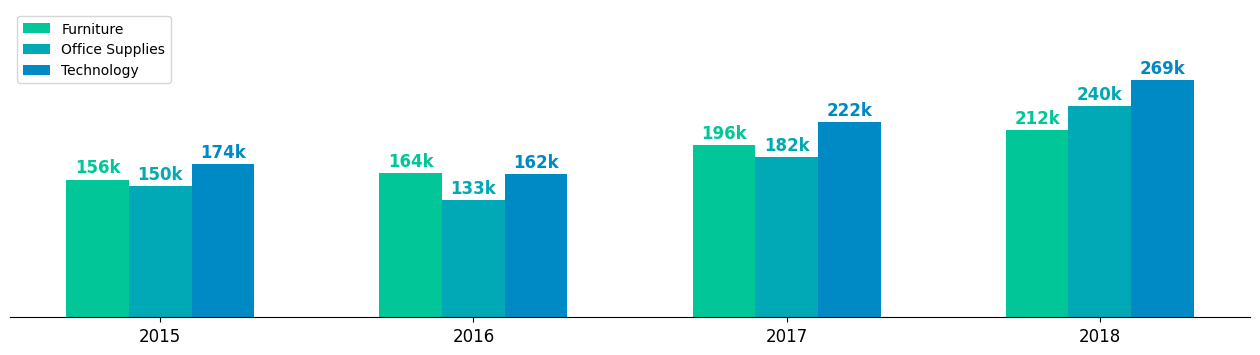

In [25]:
fig,ax = plt.subplots(
            figsize = (16,4)
        )

wid = 0.2 

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values-wid, # Como temos 3 colunas, vamos deslocar a largura da coluna inteira
       categoria[categoria.Category == 'Furniture'].Sales.values,
       color="#00c698", 
       label='Furniture', # As legendas agora serão as categorias
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values, 
       categoria[categoria.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", 
       label='Office Supplies', 
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Technology'].Ano.values+wid, 
       categoria[categoria.Category == 'Technology'].Sales.values,
       color="#008ac5", 
       label='Technology', 
       width=wid
      )

ax.legend()

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Furniture'].Ano.values[i]-wid,categoria[categoria.Category == 'Furniture'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c698")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Office Supplies'].Ano.values[i],categoria[categoria.Category == 'Office Supplies'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00a9b5")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Technology'].Ano.values[i]+wid,categoria[categoria.Category == 'Technology'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")   
    
ax.set_yticks(np.array([0,350000]))
ax.yaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2015,2019)) 
ax.tick_params(axis='x',labelsize=12) 

plt.show()

#### Podemos analisar o item tambem

In [27]:
# Podemos fazer um groupby do item
produtos = base.groupby('Product Name')['Sales'].sum()
produtos = produtos.reset_index()
produtos = produtos.sort_values('Sales', ascending=False)
top_itens = produtos.head(10)

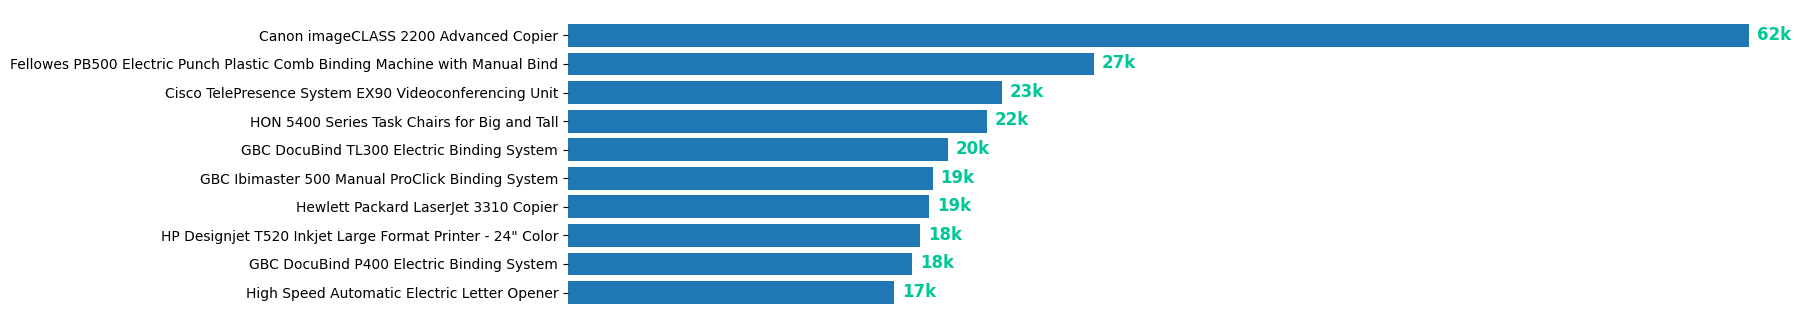

In [29]:
fig,ax = plt.subplots(
            figsize = (16,4)
        )

ax.barh(top_itens['Product Name'].values, top_itens['Sales'].values, align='center')
ax.invert_yaxis()

for i in np.arange(0,10):
    ax.annotate('{:,.0f}k'.format(top_itens['Sales'].values[i]/1000), 
                (top_itens['Sales'].values[i], i ), 
                ha="center", va="top", xytext=(18,7), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c698")


ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False) 

plt.show()

In [33]:
df_datas = pd.DataFrame([2018,2017,2016,2015])
df_datas.columns = ['Ano']

In [37]:
top_itens['uniao'] = 'unir'
df_datas['uniao'] = 'unir'

<ipython-input-37-3320f1303874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_itens['uniao'] = 'unir'


In [39]:
produto_ano = pd.merge(
    top_itens, # <- primeira base
    df_datas, # <- segunda base
    how='outer', # <- tipo de junção que vamos fazer
    on='uniao' # <- coluna que vamos usar para fazer essa junção das bases
) 

produto_ano.head()

,Product Name,Sales,uniao,Ano
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018


In [40]:
itens_ano_grafico = pd.merge(
    produto_ano,
    itens_ano,
    how='left',
    on=['Product Name','Ano']
)
        
itens_ano_grafico.head()

,Product Name,Sales_x,uniao,Ano,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017,25899.926
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015,NaN
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018,7371.742


In [41]:
itens_ano_grafico[itens_ano_grafico.Ano == 2018]['Sales_y'].values

array([35699.898,  7371.742,       nan,  7220.094, 10943.278,   760.98 ,
        9239.846,       nan,  7077.148,       nan])

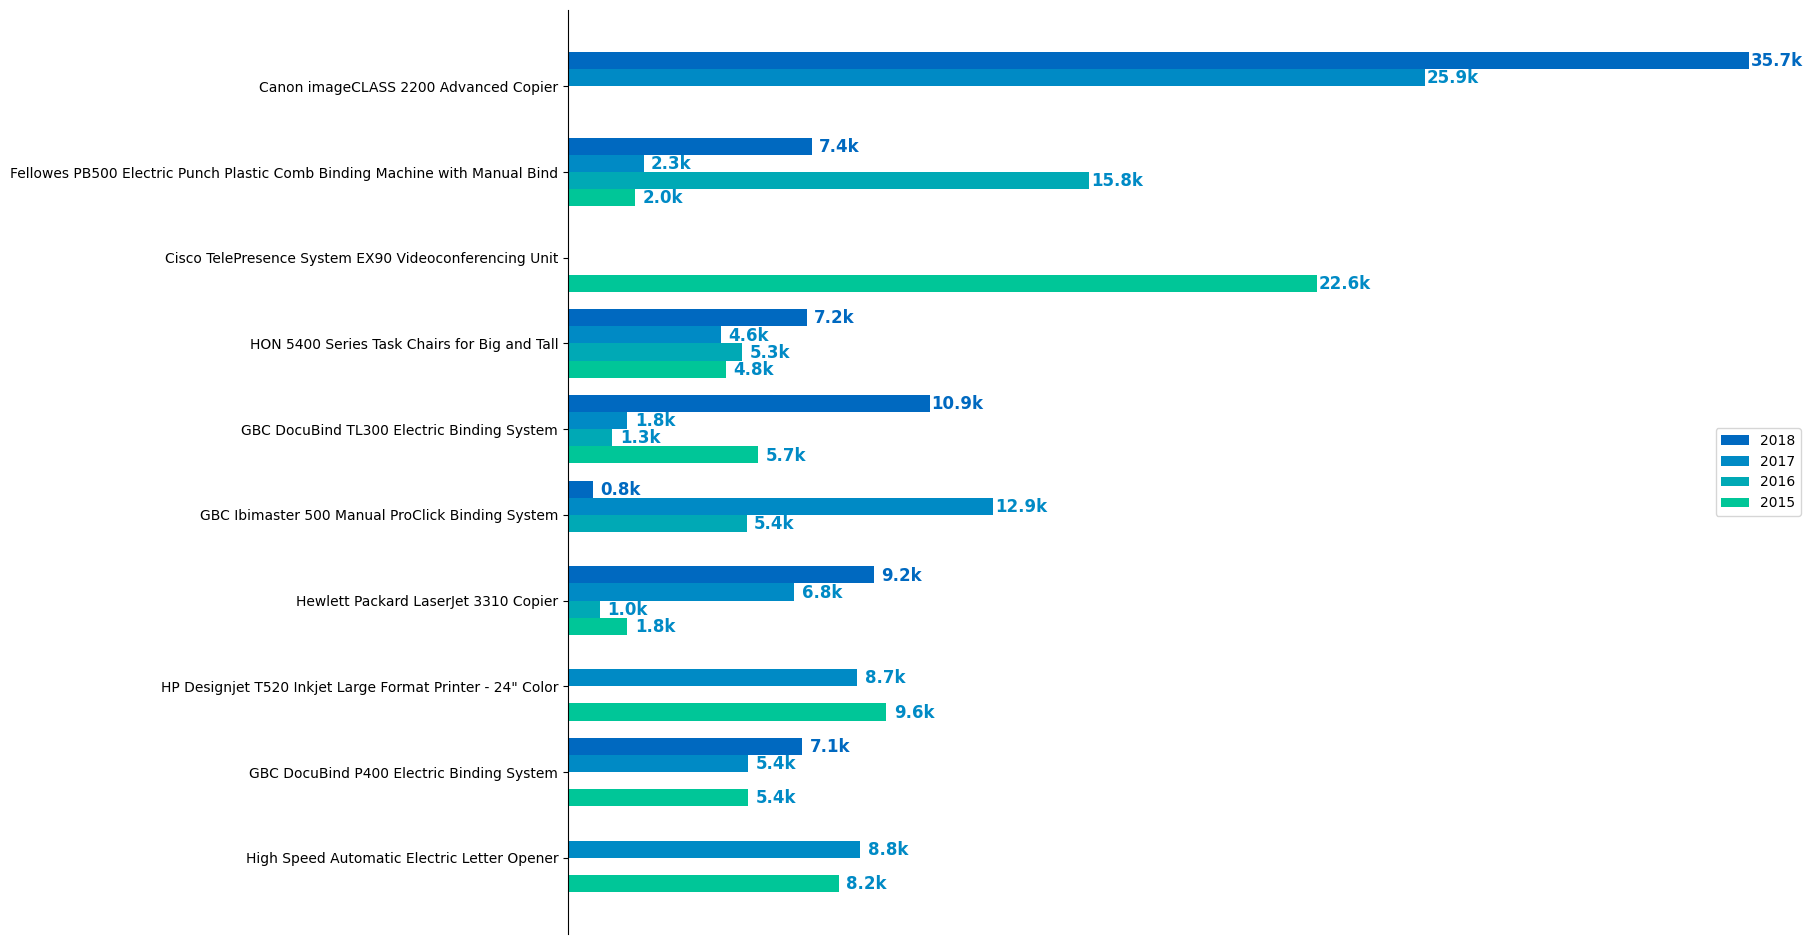

In [49]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig,ax = plt.subplots(
            figsize = (16,12)
        )

hgt = 0.2

qtd_itens = len(top_itens)

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values, # Valores de x 
        align='center',
        height=hgt, # Comprimento do gráfico
        label=2018,
        color="#0069c0"
       )
ax.barh(np.arange(0,qtd_itens)-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2017].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2017,color="#008ac5")

ax.barh(np.arange(0,qtd_itens)+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2016].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2016,color="#00a9b5")

ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2015].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2015,color="#00c698")

ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)
ax.legend()

#2018
for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i],i-hgt-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")
    
#2017
for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2017].Sales_y.values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico.Ano == 2017].Sales_y.values[i],i-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")


#2016
for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2016].Sales_y.values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico.Ano == 2016].Sales_y.values[i],i+hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")
    

#2015
for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2015].Sales_y.values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico.Ano == 2015].Sales_y.values[i],i+hgt+hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")
        
        
    
ax.yaxis.set_ticks(np.arange(0,qtd_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_itens["Product Name"]) # Colocando rótulo no meu eixo
ax.tick_params(axis='y',labelsize=10) # Melhorando o visual do eixo x

ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()